In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ale import accumulated_local_effects
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import SplineTransformer

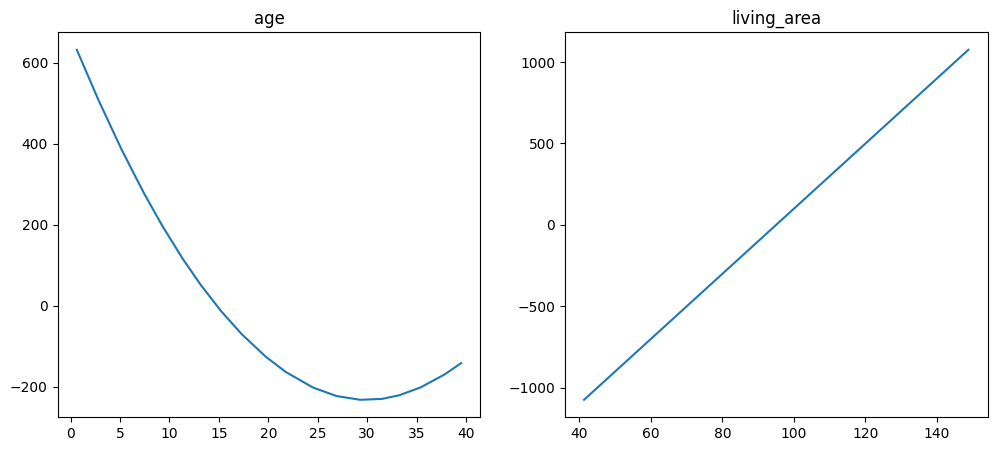

In [2]:
rng = np.random.default_rng(1)

age = rng.uniform(0, 40, size=1000)
living_area = rng.uniform(40, 150, size=1000)
X = pd.DataFrame({"age": age, "living_area": living_area})

rent = 20 * living_area - 20 * age + (age - 20) ** 2 + rng.normal(0, 10, size=1000)

preprocess_glm = ColumnTransformer(
    transformers=[
        ("spline", SplineTransformer(include_bias=False, knots="quantile"), ["age"]),
        ("linear", "passthrough", ["living_area"]),
    ],
    verbose_feature_names_out=False,
).set_output(transform="pandas")

model = Pipeline(
    steps=[
        ("preprocessor", preprocess_glm),
        ("model", LinearRegression()),
    ]
)
model.fit(X, y=rent)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for feature, ax in zip(("age", "living_area"), axes):
    ale = accumulated_local_effects(X, model.predict, feature=feature)
    ax.plot(ale["breaks"], ale["ale"])
    ax.set_title(f"{feature}")
plt.show()
